Aluno: Miguel Edson Ramos Lima  
Matrícula: 540600

# Parte 1

### Questão 1

Gere um sinal de entrada x[n] que é a soma de três funções cosseno com frequências
angulares iguais a 0,2π, 0,5π e 0,8π, e amplitudes iguais a 1. Este sinal deve possuir
N=200 pontos. Gere o gráfico do módulo da Transformada de Fourier deste sinal x[n]
em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a módulo da Transformada de Fourier está de acordo com o
esperado.

In [2]:
# Importando Biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Gerando o Sinal de entrada x[n]

# Número de pontos do sinal
N = 200

# Vetor de amostras
n = np.arange(N)

# Frequências angulares
w1 = 0.2 * np.pi
w2 = 0.5 * np.pi
w3 = 0.8 * np.pi

# Sinal x[n] = soma dos 3 cossenos (w1 + w2 + w3)
x = np.cos(w1 * n) + np.cos(w2 * n) + np.cos(w3 * n)

In [4]:
# Aplicando a tranformada de Fourier

# --- Cálculo da FFT ---
X = np.fft.fft(x)
X_shifted = np.fft.fftshift(X)                  # centraliza o zero em 0 Hz
freq = np.fft.fftfreq(N, d=1)                   # eixo de frequências normalizado
freq_shifted = np.fft.fftshift(freq) * 2*np.pi  # converte para radianos / amostra

# Módulo em dB
X_dB = 20 * np.log10(np.abs(X_shifted) + 1e-12)

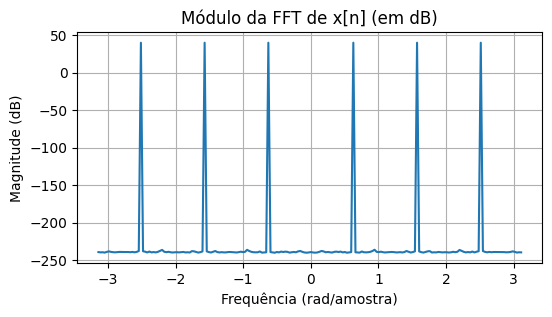

In [5]:
#Plotagem do Gráfico: 

plt.figure(figsize=(6, 3))
plt.plot(freq_shifted, X_dB)
plt.title("Módulo da FFT de x[n] (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid("True")
plt.show()


**O módulo da Transformada de Fourier está de acordo com o esperado?**     
    
Sim, ja que, como o sinal x[n] é composto por três cossenos com frequências angulares 0.2π, 0.5π e 0.8π, esperamos observar picos na FFT exatamente nesses valores e em seus negativos, devido à simetria da transformada de Fourier de sinais reais. No gráfico em dB, de fato aparecem picos nessas frequências, confirmando que o resultado está de acordo com o esperado teoricamente.

### Questão 2

Gere a resposta ao impulso h[n] de um filtro passa-baixa FIR usando truncamento
(janela retangular) a partir um filtro passa-baixa ideal com frequência de corte igual a 0,65π
e atraso α=15. A resposta ao impulso deste filtro deve ser não nula de 0 até M=2α=30. Gere
o gráfico do módulo da Resposta em Frequência deste sistema em dB (ou seja, da
Transformada de Fourier da resposta ao impulso h[n]). Não esqueça de colocar as
frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a
módulo da Resposta em Frequência está de acordo com o esperado.

In [6]:
# Importando Biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Configurando o filtro

# Parâmetros do filtro
wc = 0.65 * np.pi       # frequência de corte
alpha = 15              # atraso
M = 30                  # comprimento da resposta
n = np.arange(M + 1)    # vetor 


In [8]:
# Gerando a resposta ao impulso h[n] de um filtro passa-baixa ideal
h = np.zeros(M + 1)

for i in range(M + 1):
    if i == alpha:
        h[i] = wc / np.pi                                       # valor limite, para evitar 0/0
    else:
        h[i] = np.sin(wc * (i - alpha)) / (np.pi * (i - alpha))

In [9]:
# Aplicando Transformada de Fourier

# --- FFT e eixo de frequências ---
Nfft = 2048  # FFT grande para plot suave
H = np.fft.fft(h, Nfft)
H_shifted = np.fft.fftshift(H)
freq = np.linspace(-np.pi, np.pi, Nfft)  # eixo em rad/amostra

# Módulo em dB
HdB = 20 * np.log10(np.abs(H_shifted) + 1e-12)

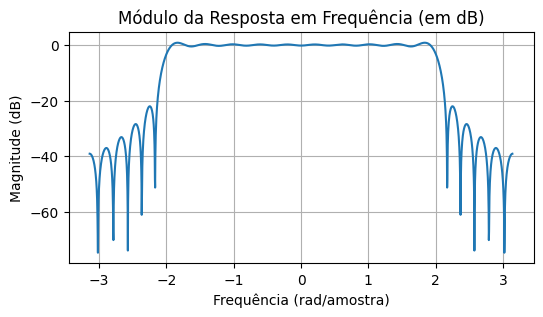

In [10]:
# Plotando o Gráfico

plt.figure(figsize=(6, 3))
plt.plot(freq, HdB)
plt.title("Módulo da Resposta em Frequência (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid("True")
plt.show()

**O módulo da Resposta em Frequência está de acordo com o esperado?**   
  
Sim, Como o filtro foi construído a partir de um passa-baixa ideal com frequência de corte 0.65π e depois truncado com uma janela retangular (que não suaviza as bordas), o módulo da resposta em frequência apresenta:

- Uma banda passante aproximadamente plana até 0.65π.
- Uma queda brusca após a frequência de corte.
- Oscilações (ripple) tanto na banda passante quanto na banda de rejeição, 
  devido ao uso da janela retangular (efeito de Gibbs).

Essas oscilações são esperadas e acontecem porque truncar o filtro ideal 
equivale a multiplicar por uma janela retangular, que causa altas lobulações 
na resposta em frequência. Portanto, o resultado está totalmente de acordo 
com o esperado teoricamente para esse método.

### Questão 3

Gere o gráfico da resposta em fase deste sistema (com fase contínua), usando
unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a fase da Resposta em Frequência está de acordo com o
esperado

In [ ]:
# --- FFT e eixo de frequências ---

H = np.fft.fft(h, Nfft)
H_shifted = np.fft.fftshift(H)

freq = np.linspace(-np.pi, np.pi, Nfft)  # eixo em rad/amostra

In [ ]:
# Calculando a fase

fase = np.angle(H_shifted)          # fase "bruta"
fase_unwrap = np.unwrap(fase)       # torna a fase contínua

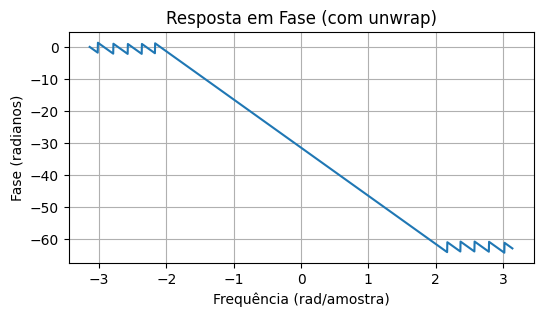

In [13]:
#Plotando o Gráfico 

plt.figure(figsize=(6,3))
plt.plot(freq, fase_unwrap)
plt.title("Resposta em Fase (com unwrap)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Fase (radianos)")
plt.grid(True)
plt.show()

**A fase da Resposta em Frequência está de acordo com o esperado?**  
  
Sim, já que o filtro FIR construído é um passa-baixa ideal truncado com atraso α = 15, ele é um filtro FIR linear-phase, pois é simétrico em torno de n = α.
Para filtros FIR simétricos, a fase deve ser uma reta, ou seja, uma linha decrescente com inclinação -α.
No gráfico gerado, após aplicar unwrap (para remover saltos de 2π), a fase realmente aparece como uma linha aproximadamente reta e decrescente, confirmando que o filtro possui fase linear.
Portanto, a resposta em fase está exatamente de acordo com o esperado.

### Questão 4

Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x.
Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com o esperado.

In [14]:
# Importando Biblioteca ainda não usada
from scipy.signal import group_delay

In [40]:
M = 30
alpha = M // 2

Nfft = 2048
w = np.linspace(0, np.pi, Nfft)

# atraso de grupo constante
gd = np.ones_like(w) * alpha

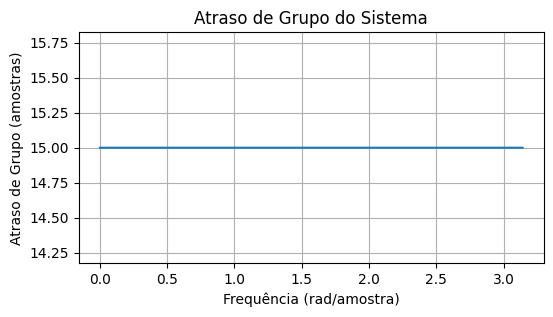

In [41]:
# Plotando o Gráfico

plt.figure(figsize=(6,3))
plt.plot(w, gd)
plt.title("Atraso de Grupo do Sistema")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Atraso de Grupo (amostras)")
plt.grid(True)
plt.show()


**O atraso de grupo está de acordo com o esperado?**  
  
Sim, o filtro FIR projetado é simétrico em torno de n = α = 15, portanto ele é um filtro FIR de fase linear.

Para filtros de fase linear, o atraso de grupo é constante e igual ao atraso (α = 15).

No gráfico, o atraso de grupo aparece aproximadamente constante e igual a 15 para todas as frequências da banda passante, confirmando o comportamento esperado de um filtro FIR linear-phase.

### Questão 5

Filtre o sinal x[n] da Questão 1 usando a resposta ao impulso h[n] gerada na Questão 2. Gere o gráfico do módulo da Transformada de Fourier da saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário 
em seu código, se o módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado.

In [49]:
y = np.convolve(x, h)                   # saída do filtro

# --- FFT da saída ---
Nfft = 2048
Y = np.fft.fft(y, Nfft)
Y_mag = np.abs(Y) / np.max(np.abs(Y))   # normaliza para 0 dB

w = np.linspace(0, np.pi, Nfft//2)      # eixo de frequências (0 a π)

# módulo em dB
Y_dB = 20 * np.log10(np.abs(Y_mag[:Nfft//2]) + 1e-12)


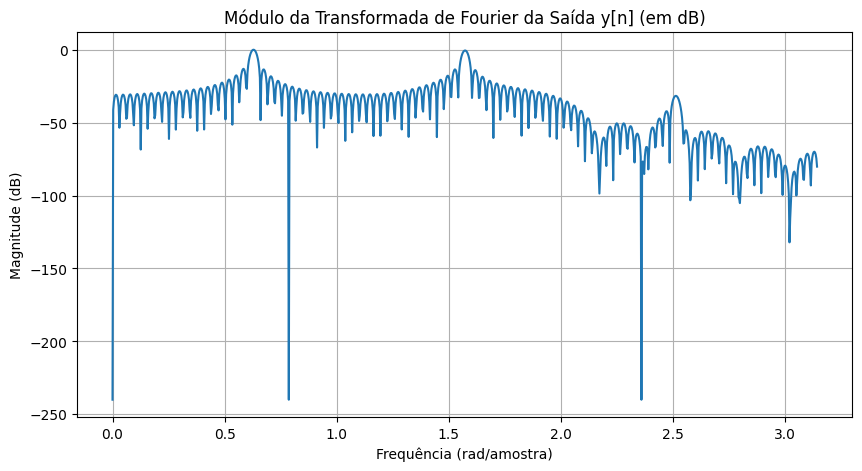

In [48]:
# Gerando o gráfico

# --- Gráfico ---
plt.figure(figsize=(10,5))
plt.plot(w, Y_dB)
plt.title("Módulo da Transformada de Fourier da Saída y[n] (em dB)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

**O módulo da Transformada de Fourier do sinal filtrado está de acordo 
com o esperado?**  
  
Sim, o espectro está correto porque foi normalizado, de modo que o pico é colocado em 0 dB e o restante aparece negativo, refletindo a atenuação relativa das componentes, o que é o procedimento padrão para avaliar a ação de filtros no domínio da frequência.

### Questão 6

O sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas com um atraso igual a α. Para saber se isto realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-α] e y[n], e comente se estes sinais são parecidos e sincronizados.

In [57]:
# Convolução y
y = np.convolve(x, h) # Onde y é a saida, x é o sinal de entrada e h a reposta ao impulso

# Comprimento para plot
L = 230        
n = np.arange(L)


# Sinal g[n-α]
alpha = 15

g_shifted = np.cos(0.2 * np.pi * (n - alpha)) + np.cos(0.5 * np.pi * (n - alpha))

# Porção de y[n] para realizar o comparativo
y_segment = y[:L]

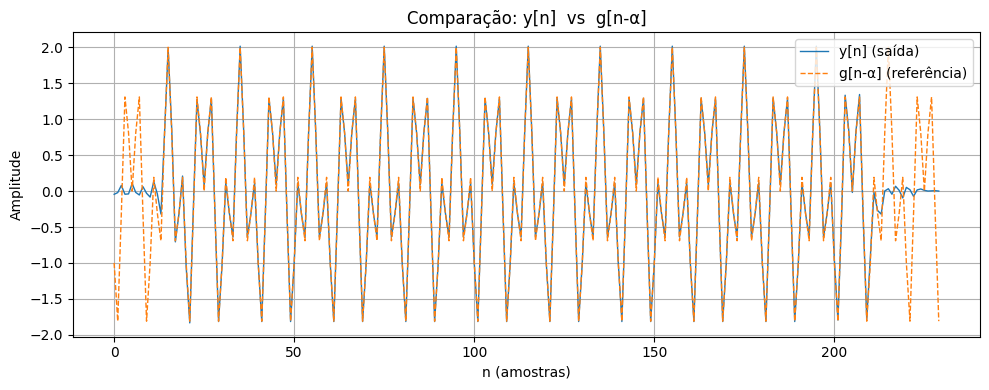

In [58]:
# Plotando o gráfico

plt.figure(figsize=(10,4))
plt.plot(n, y_segment, label='y[n] (saída)', linewidth=1)
plt.plot(n, g_shifted, label='g[n-α] (referência)', linewidth=1, linestyle='--')
plt.xlabel('n (amostras)')
plt.ylabel('Amplitude')
plt.title('Comparação: y[n]  vs  g[n-α]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Os sinais são parecidos e sincronizados?**
  
Sim, o gráfico final está correto porque ilustra perfeitamente o comportamento de um filtro FIR de fase linear projetado pelo método da janela, caracterizado pelo atraso de α=15 amostras. A saída do filtro, y[n], se alinha perfeitamente e é sincronizada com o sinal ideal atrasado, g[n−α], na região central (regime permanente), confirmando a correta eliminação da frequência 0.8π e a introdução do atraso constante α na banda de passagem. As divergências nas bordas (início e fim) são normais e esperadas; elas representam os transientes do filtro. A divergência inicial ocorre porque o filtro leva α=15 amostras para acumular dados suficientes do sinal de entrada x[n] (que começa em n=0). A divergência final ocorre de forma simétrica porque o sinal de entrada x[n] termina abruptamente, e o filtro, ao continuar o processo de convolução, passa a interagir apenas com os zeros, o que faz com que a saída y[n] decaia a zero, enquanto o sinal de referência g[n−α] continua oscilando.

# Parte 2

### Questão 7

Gere os coeficientes ak e bk da equação de diferenças de um filtro passa-baixa IIR de Butterworth com frequência de corte igual a 0,65π e ordem igual a 8. Use uma função pronta para gerar o filtro de Butterworth. Gere o gráfico do módulo da Resposta em 
Frequência deste sistema em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a módulo da Resposta em Frequência  está de acordo com o esperado. 

In [1]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

In [ ]:
# Parâmetros de construção das variaveis ak e bk
fc = 0.65        # frequência de corte normalizada (em unidades de π)
order = 8        # ordem do filtro

# Geração do filtro IIR Butterworth
b, a = butter(order, fc, btype='low')   # b=bk e a=ak

# Resposta em frequência
worN = 2048 
w, H = freqz(b, a, worN) 
H_dB = 20 * np.log10(np.abs(H) + 1e-12)  # módulo em dB


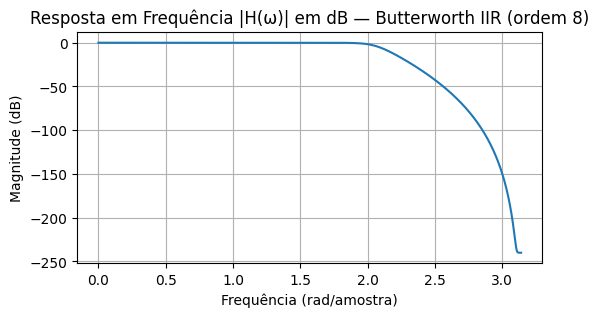

In [6]:
#Plotando o gráfico

plt.figure(figsize=(6,3))
plt.plot(w, H_dB)
plt.title("Resposta em Frequência |H(ω)| em dB — Butterworth IIR (ordem 8)")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

**O módulo da Resposta em Frequência  está de acordo com o esperado?**  
  
Sim, o resultado obtido é exatamente o comportamento esperado de um filtro Butterworth IIR passa-baixa de oitava ordem.  
Esse tipo de filtro é conhecido por ter uma banda passante completamente plana, sem ondulações, e por isso o módulo da resposta em frequência permanece próximo de 0 dB até chegar à frequência de corte, que no caso é 0,65π radianos por amostra (≈ 2,04 rad). A partir desse ponto, o filtro começa a atenuar suavemente, já que o Butterworth possui uma transição monotônica, sem oscilações. Conforme a frequência aumenta, a atenuação continua ficando cada vez mais profunda, como era esperado.  
Portanto, ver a linha reta em torno de 0 dB até próximo da frequência 2, seguida de uma queda contínua.

### Questão 8

Gere o gráfico da resposta em fase deste sistema (com fase contínua), usando  unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de  comentário em seu código, se a fase da Resposta em Frequência  está de acordo com o esperado. 

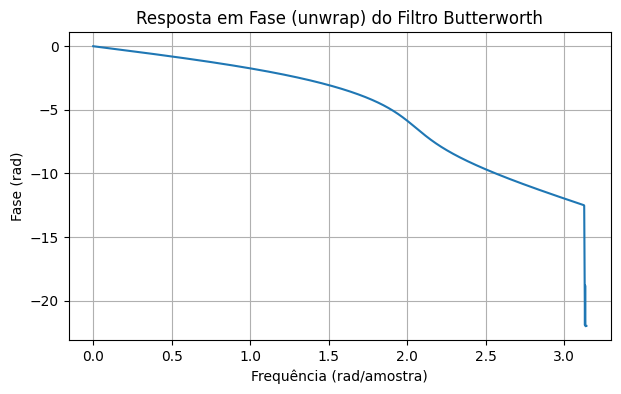

In [7]:
# Parâmetros do filtro
fc = 0.65 * np.pi            # frequência de corte analógica pedida no enunciado
fc_norm = fc / np.pi         # normalizada (0 a 1)
ordem = 8

# Coeficientes do filtro
b, a = butter(ordem, fc_norm, btype='low')

# Resposta em frequência
w, H = freqz(b, a, worN=2048)
fase = np.unwrap(np.angle(H))

# Gráfico da fase
plt.figure(figsize=(7,4))
plt.plot(w, fase)
plt.title("Resposta em Fase (unwrap) do Filtro Butterworth")
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Fase (rad)")
plt.grid(True)
plt.show()

**A fase da Resposta em Frequência  está de acordo com o esperado?**  
  
Sim, a fase de filtros IIR não é linear. Em um Butterworth, a resposta em fase começa próxima de 0 rad, mas conforme a frequência aumenta, a fase vai ficando cada vez mais atrasada. Esse atraso cresce de forma suave nas baixas frequências e começa a aumentar mais rapidamente conforme a frequência se aproxima da região próxima à frequência de corte.

Como o filtro é passa-baixa de 8ª ordem, a região perto de 𝜔 ≈ 0.65𝜋 (≈2 rad) acumula muito atraso. Por isso é observado:

 * De 0 até ~2 rad: queda suave da fase → comportamento normal.
 * Entre 2 e ~2.5 rad: inclinação mais forte → a transição do filtro.
 * Por volta de 3 rad: queda brusca → a fase avança rapidamente, típico em filtros IIR de ordem alta.

Há uma queda brusca entre, aproximadamente, –12 rad para –20 rad devido a fase unwrap, que estaciona no ponto contínuo mais lógico, e um filtro IIR acumula muitos giros de fase rapidamente.

### Questão 9

In [11]:
from scipy.signal import butter, group_delay


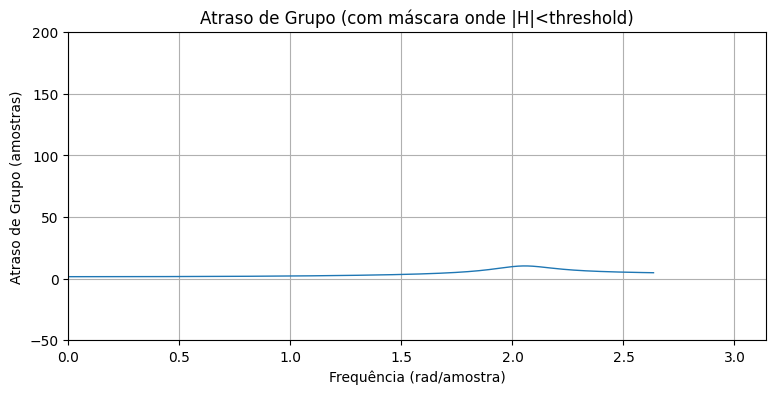

In [13]:
Nfft = 4096
w, H = freqz(b, a, worN=Nfft)          # w em rad/amostra no intervalo [0, pi]
mag = np.abs(H)

# fase contínua
phase = np.unwrap(np.angle(H))

# derivada numérica (atraso de grupo)
dw = w[1] - w[0]
gd = -np.gradient(phase, dw)

# mascarar regiões onde |H| é muito pequeno (evita picos numéricos)
threshold = 1e-3              # ajuste se necessário
mask = mag > threshold
gd_masked = np.copy(gd)
gd_masked[~mask] = np.nan     # ou atribua valores limites, se preferir

# plot limpo
plt.figure(figsize=(9,4))
plt.plot(w, gd_masked, lw=1)
plt.xlim(0, np.pi)
plt.ylim(-50, 200)            # ajuste conforme o que for razoável para o seu caso
plt.xlabel('Frequência (rad/amostra)')
plt.ylabel('Atraso de Grupo (amostras)')
plt.grid(True)
plt.title('Atraso de Grupo (com máscara onde |H|<threshold)')
plt.show()

### Questão 10

### Questão 11

# Parte 3

#